In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.data_preprocess as preprocess
from utils.model_metrics import ModelMetric
from utils.mode_figure import ModelFigre
import datetime
from utils.model_callback import step_decay, exp_decay

In [2]:
modelmetric = ModelMetric()

In [3]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [4]:
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [5]:
import utils.network.network12 as model

In [6]:
net = model.MyLstmModel()

In [7]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, clipnorm=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=modelmetric.metric('binary_crossentropy')) # categorical_crossentropy

In [8]:
from tensorflow.keras import callbacks
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network-RMSprop")

logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(step_decay)
csv_log = tf.keras.callbacks.CSVLogger('../model_record/'+dir_name+"/log", separator=',', append=False)
if not os.path.isdir('../model_record/'+dir_name):
    os.mkdir('../model_record/'+dir_name)

In [9]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

17383.0000 - tn: 322041.0000 - fn: 17383.0000 - acc: 4.2130e-04 - precision: 0.9488 - recall: 0.9488 - auc: 0.9906 - binary_accuracy: 0.9488 - binary_crossentropy: 0.1227 - val_loss: 0.0754 - val_tp: 141162.0000 - val_fp: 4306.0000 - val_tn: 141162.0000 - val_fn: 4306.0000 - val_acc: 0.0000e+00 - val_precision: 0.9704 - val_recall: 0.9704 - val_auc: 0.9966 - val_binary_accuracy: 0.9704 - val_binary_crossentropy: 0.0754
Epoch 4/40
663/663 [==============================] - 12s 18ms/step - loss: 0.1206 - tp: 322446.0000 - fp: 16978.0000 - tn: 322446.0000 - fn: 16978.0000 - acc: 0.0000e+00 - precision: 0.9500 - recall: 0.9500 - auc: 0.9909 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1206 - val_loss: 0.0742 - val_tp: 141335.0000 - val_fp: 4133.0000 - val_tn: 141335.0000 - val_fn: 4133.0000 - val_acc: 0.0000e+00 - val_precision: 0.9716 - val_recall: 0.9716 - val_auc: 0.9968 - val_binary_accuracy: 0.9716 - val_binary_crossentropy: 0.0742
Epoch 5/40
663/663 [===========================

In [10]:
results  = net.evaluate(X_test, y_test, verbose=1)
modelmetric.getTrainMetricValue(net, results)

6495/6495 [==============================] - 57s 9ms/step - loss: 0.1029 - tp: 197133.0000 - fp: 10678.0000 - tn: 197133.0000 - fn: 10678.0000 - acc: 0.0000e+00 - precision: 0.9486 - recall: 0.9486 - auc: 0.9936 - binary_accuracy: 0.9486 - binary_crossentropy: 0.1029
loss :  0.10290833562612534
tp :  197133.0
fp :  10678.0
tn :  197133.0
fn :  10678.0
acc :  0.0
precision :  0.9486167430877686
recall :  0.9486167430877686
auc :  0.9935803413391113
binary_accuracy :  0.9486167430877686
binary_crossentropy :  0.10290833562612534


In [11]:
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
modelmetric.confusion_matrix(y_label, y_class)
modelmetric.eva_metric(y_label, y_class)

TrueNegatives result:  130815.0
TruePositives result:  66318.0
FalseNegatives result:  9415.0
FalsePositives result:  1263.0
Recall result:  0.8756817
Precision result:  0.9813113


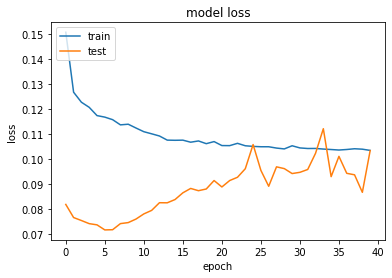

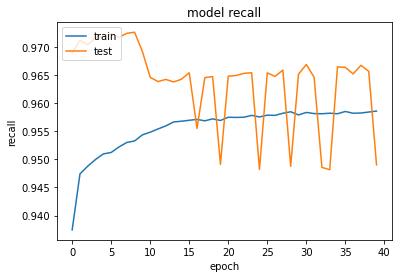

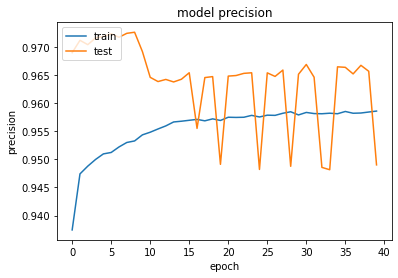

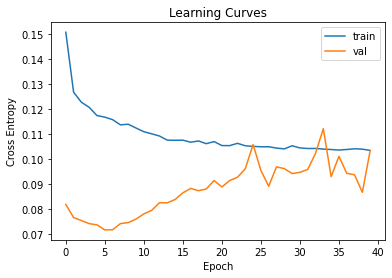

In [12]:
mf = ModelFigre("../model_record", dir_name, model_)
mf.loss_graph()
mf.recall_graph()
mf.precision_graph()
mf.cross_entropy_graph()
# fig.save_model(net,dir_name)

In [13]:
# mf.lr_graph(model_, dir_name)